# Using R inside of a Python-Based Jupyter Notebook

The following code will demonstrate how to use R inside of a python-based notebook.  This will allow us to pass variables freely between the two languages, run libraries written in both, etc.  

If you want to run an exclusively R-based terminal, I'd advise you to install the following instead: https://github.com/IRkernel/IRkernel.  The below code is for using both languages together.

# Installation

To be able to use R inside of Python-based Jupyter Notebooks, you first need to install R.  Next, just run the following from a console:
* pip install rpy2


# Load  required modules:

Start Jupyter Notebooks and create a Python Notebook.

* To load the rpy2 module, you run the load_ext command, as below.
* Any commands you want in R you simply prefix with %R.  If you want the whole cell in R, you begin the cell with %%R.
* Other statements are, by default, in python.


In [1]:
%load_ext rpy2.ipython
%R require(ggplot2)  # This line is run in R, as dictated by the %R flag.  The rest of the cell is in Python.

import pandas as pd
import numpy as np

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ggplot2

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Need help getting started? Try the cookbook for R:
http://www.cookbook-r.com/Graphs/

  res = super(Function, self).__call__(*new_args, **new_kwargs)


# Example 1: Create data in Python, send to R to plot in ggplot:
First, let's create our dummy Pandas dataframe:

In [2]:
#This cell is in Python.  All cells default to python unless we explicitly tell them to use R.
df = pd.DataFrame({'case': ['case1', 'case2', 'case3', 'case4', 'case1', 'case2', 'case3', 'case4'],
                  'var1': [3,3,2,2,2,6,1,3],
                  'var2': [5,4,4,6,7,9,2,9],
                  'var3': [9,6,1,6,2,7,1,6]})
df.head()

,case,var1,var2,var3
0,case1,3,5,9
1,case2,3,4,6
2,case3,2,4,1
3,case4,2,6,6
4,case1,2,7,2


We will now send this data to R using the -i flag, and plot it using ggplot.  Note: here I am specifying that the entire cell will be in R by using the %%R flag.

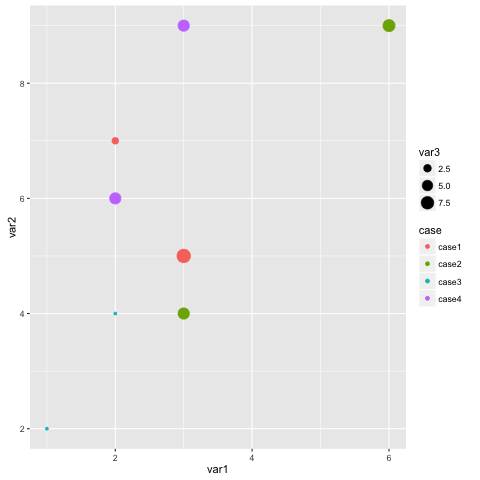

In [3]:
%%R -i df
#This cell is ENTIRELY R, since we used the double %% symbol IN THE FIRST LINE to say that all future lines are in R.
head(df)
ggplot(data = df) + geom_point(aes(x=var1, y=var2, color=case, size=var3))

# Example 2: Create data in Python, send to R, do some stuff, send output back to Python:

First we will create two numpy arrays:

In [4]:
#Again, cells default to python.
x = np.array([1,2,3,4,5,6])
y = np.array([8,2,6,2,1,1])

We now import these arrays into R using the -i flag, and output the mycoef statement with the -o flag. 

NOTE: If you import or export multiple variables, comma separate but do NOT space after the comma, or it will error!

(Intercept)           x 
   7.533333   -1.200000 


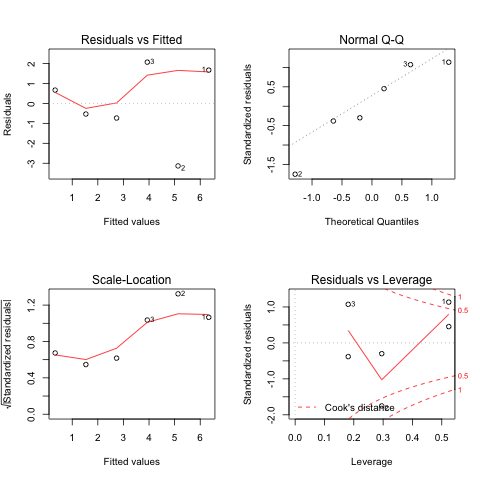

In [5]:
%%R -i x,y -o par,x
#The above statement does the following: entire cell is in R, 'import from python' x and y, 'output from R back to python' par, x.

my_lm <- lm(y~x) #create a linear model.
par<-coef(my_lm) #save the coefficients
print(par) #print coefficients
#Let's set x and y to 0.  Note, however, that we are only passing x back to Python.  the y that exists in our python environment will NOT receive this change!
x <- x * 0
y <- y * 0
par(mfrow=c(2,2)) #plot in a 2x2 grid
plot(my_lm) #plot

now we print the output and examine our data.  We can send back numbers, arrays, and dataframes.

In [6]:
#back in python.
print par
#x was exported above, so is now set to 0 in both Python and R:
print 'x in Python and R:'
print x 
%R print(x) #this line is in R.
#y was set to 0 in R, but wasn't exported, so now they are NOT the same.  Be careful with this!
print 'y in Python and R:'
print y 
%R print(y)

[ 7.53333333 -1.2       ]
x in Python and R:
[ 0.  0.  0.  0.  0.  0.]


[1] 0 0 0 0 0 0


y in Python and R:
[8 2 6 2 1 1]


[1] 0 0 0 0 0 0


# Bash Script

We can also execute bash script from the notebook, as well as send variables back and forth:

In [7]:
myFirstVar='something'
mySecondVar='another thing'

In [8]:
%%bash -s "$myFirstVar" "$mySecondVar"
echo "This bash script can use both $1 and $2"

This bash script can use both something and another thing
